### Description:
Testing Environment for removing trees from a panoramic image

### Functions:

### Main:

c:\Users\Jared\OneDrive\Desktop\UrbanRep\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Jared\OneDrive\Desktop\UrbanRep\.venv\lib\site-packages\transformers\models\segformer\feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
c:\Users\Jared\OneDrive\Desktop\UrbanRep\.venv\lib\site-packages\transformers\utils\deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerFeatureExtractor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


about to convert logits to class predictions
about to visualize
final


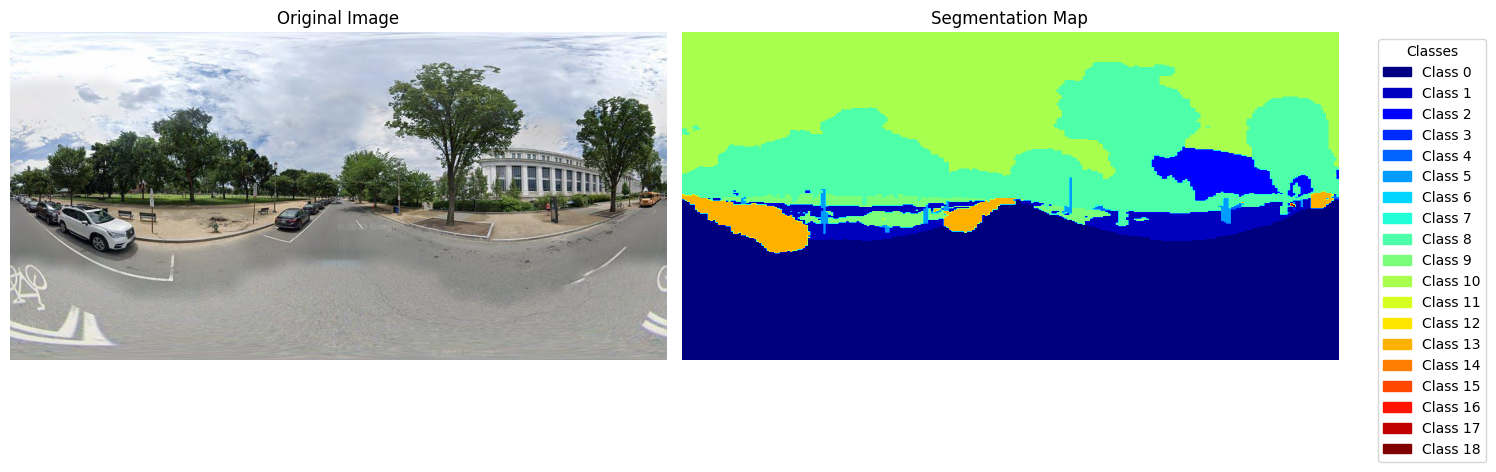

In [ ]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image


# testing:
def main():
    image_path = "data\panoramic_imgs\_HveufZbNlDXqHIEDRNFzg.jpg" 
    image = Image.open(image_path)

    feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b5-finetuned-cityscapes-1024-1024")
    model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b5-finetuned-cityscapes-1024-1024")

    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits

    print("about to convert logits to class predictions")
    # convert logits to class predictions
    predicted_class = torch.argmax(logits, dim=1)  # shape (batch_size, height/4, width/4)

    # upsample to match input image size
    predicted_class = torch.nn.functional.interpolate(
        predicted_class.unsqueeze(1).float(),  # Add channel dimension
        size=image.size[::-1],  # Match input image dimensions (height, width)
        mode="nearest"
    ).squeeze(1).to(torch.int32)

    print("about to visualize")
    # visualize
    segmentation_map = predicted_class[0].cpu().numpy()

    num_classes = logits.shape[1]
    cmap = plt.get_cmap('jet', num_classes) # just choose a colormap to use

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    print("final")

    # Original image
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    # Segmentation map
    ax[1].imshow(segmentation_map, cmap=cmap, vmin=0, vmax=num_classes - 1)
    ax[1].set_title("Segmentation Map")
    ax[1].axis("off")

    legend_patches = [
        mpatches.Patch(color=cmap(i / num_classes), label=f'Class {i}') for i in range(num_classes)
    ]
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title="Classes")


    plt.tight_layout()
    plt.show()

    # save the image
    plt.imsave("data\image_processing\\test_segmented_image.jpg", segmentation_map, cmap=cmap, vmin=0, vmax=num_classes - 1)

main()


### TODO Remove the trees (class 8) and replace them with either sky (class 10) or buildings (class 2)

In [2]:
# Panoramic image examples can be found in the data/panoramic_imgs folder

# the idea is we call this function and pass in an image, and it will return the same image, but with the trees removed
# we can either remove trees from the original image, or remove them from the segmentation map

# TODO

